In [1]:
import tensorflow as tf
import pandas as pd
import sklearn
import matplotlib
import keras
import numpy as np
import matplotlib.pyplot as plt
import time

# Import training data 
df = pd.read_csv('case3_data4.csv')

dataset = df.values

X = dataset[:,0:5]
Y = dataset[:,5]
Y1 = Y.reshape(-1, 1)


Using TensorFlow backend.


In [2]:
# Note! scaling is not used for Gradient Boosting
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

Y_scale = min_max_scaler.fit_transform(Y1)

# Split data into traning and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.25)
print(X_train.shape, X_val.shape, Y_train.shape, Y_val.shape)

(749, 5) (250, 5) (749,) (250,)


Time for GBR fitting: 0.873
Mean Squared Error for Gradient Boosting: 0.0003201523373310662


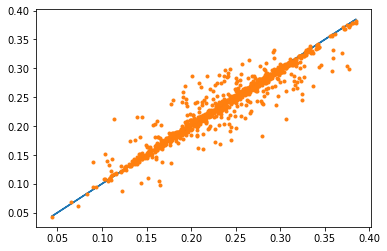

In [3]:
# Fit Gradient Boosting 
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=1000)

stime = time.time()
gb.fit(X_train, Y_train)
print("Time for GBR fitting: %.3f" % (time.time() - stime))
X_val = X;
Y_val = Y;
Y_pred_gb = gb.predict(X_val)
mae = np.mean(abs(Y_pred_gb - Y_val))
mse = np.mean((Y_pred_gb - Y_val)**2)
print('Mean Squared Error for Gradient Boosting:', mse)

plt.plot(Y_val,Y_val)
plt.plot(Y_val,Y_pred_gb,'.')

In [4]:
# ------------ Closed-loop testing starts here ! --------------
# import and initialize model 
import Model as HEx
class parameters():
    T0=60      
    w0=100    
    wh1=30    
    wh2=50     
    Th1=120   
    Th2=220    
    UA1=50  
    UA2=80 
    
par = parameters()

# initial operating point
u = 0.5
y = np.array([60,85.714,158.46,220,0.5])
y = y.reshape(1,-1)


In [5]:
# closed loop iteration 
J = []
U = []
Ju = []
u = 0.5
for i in range(50):
    u = gb.predict(y)
    meas = HEx.hex_output(u,par)
    y = np.array([meas[0],meas[7],meas[2],meas[4],u])
    y = y.reshape(1,-1)
    J.append(meas[7])
    U.append(u)
    

print('============================')
print('True optimum')
print('Cost J      : 125.4591')
print('Input u     : 0.2348')
print('----------------------------')
print('Converged values')
print('Cost J      :', meas[7])
print('Input u     :', u)
print('============================')

True optimum
Cost J      : 125.4591
Input u     : 0.2348
----------------------------
Converged values
Cost J      : [125.42605096]
Input u     : [0.21174687]


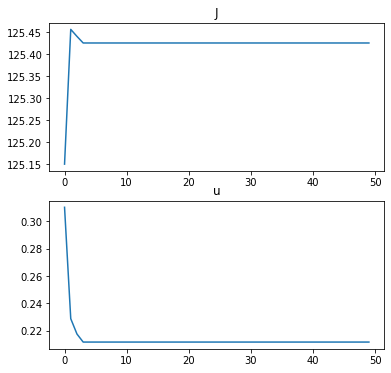

In [6]:
# plot results 

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1,
                                       sharex=False, figsize=(6, 6))
ax1.set_title('J')
ax1.plot(J)

ax2.set_title('u')
ax2.plot(U)
